In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


2023-04-11 12:22:05.326422: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


[]


2023-04-11 12:22:08.325333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib:/usr/local/cuda/latest/lib64/:/usr/local/cuda/latest/extras/CUPTI/lib64:/usr/lib:/usr/local/cuda/latest/:/usr/local/cuda/latest/lib64
2023-04-11 12:22:08.325349: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-11 12:22:08.325358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dover): /proc/driver/nvidia/version does not exist


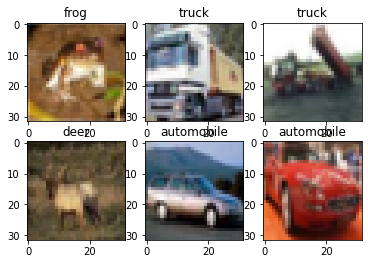

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [3]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  ### Pretrained Model







In [25]:
# model = ResNet50(weights='imagenet')

model = tf.keras.models.Sequential()

model.add(tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
    pooling='avg',
    classes=100
    ))
for layer in model.layers:
        layer.trainable=False 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='Softmax'))

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 25,167,242
Trainable params: 1,579,530


In [28]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=20
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs)



Epoch 1/20
782/782 [==============================] - 32s 40ms/step - loss: 0.1650 - accuracy: 0.9445
Epoch 2/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1361 - accuracy: 0.9542
Epoch 3/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1409 - accuracy: 0.9536
Epoch 4/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1340 - accuracy: 0.9565
Epoch 5/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1162 - accuracy: 0.9632
Epoch 6/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1251 - accuracy: 0.9582
Epoch 7/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1083 - accuracy: 0.9656
Epoch 8/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1068 - accuracy: 0.9648
Epoch 9/20
782/782 [==============================] - 31s 40ms/step - loss: 0.1133 - accuracy: 0.9639
Epoch 10/20
782/782 [==============================] - 31s 40ms/step - loss: 0.105

In [29]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 6s 38ms/step - loss: 3.9491 - accuracy: 0.6011
Accuracy :  0.6011000275611877


### Predicting 

4
Prediction Class Label :  6
Prediction Class Name  :  frog
Actual Class Name  :  frog


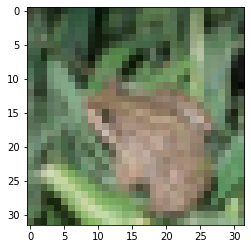

In [23]:
pred_model=tf.keras.models.Sequential()
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)
cnt =4


predtions= pred_model(test_images)
pred=predtions[cnt]
# print(pred)
label= np.argmax(pred)

# print pred + Image
plt.imshow(test_images[cnt],cmap='gray')
print(label)
print("Prediction Class Label : ",test_labels[label])
print("Prediction Class Name  : ",classes[test_labels[label]])
print("Actual Class Name  : ",classes[test_labels[cnt]])


In [8]:
# cnt= random.randint(0,100)
# img = test_images[cnt]
# # img1 = tf.image.resize(img, (224,224))

# x = image.img_to_array(img)
# x1=x.copy()  # this is done to avoid error "X is read only"
# x1 = np.expand_dims(x1, axis=0)
# x1 = preprocess_input(x1)

# preds = model.predict(x1)
# # print(preds[0][0])
# print('Top 3 Values:', decode_predictions(preds, top=3)[0])
# print('Predicted :', decode_predictions(preds, top=3)[0][0][1])
# print('Actual    :',classes[test_labels[cnt]])
# plt.imshow(img,cmap='gray')

